<a href="https://colab.research.google.com/github/manish180/cnnimage1/blob/master/cnnimagetf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!unzip train.zip


Streaming output truncated to the last 5000 lines.
 extracting: train/55.png            
 extracting: train/550.png           
 extracting: train/5500.png          
 extracting: train/5501.png          
 extracting: train/5502.png          
 extracting: train/5503.png          
 extracting: train/5504.png          
 extracting: train/5505.png          
 extracting: train/5506.png          
 extracting: train/5507.png          
 extracting: train/5508.png          
 extracting: train/5509.png          
 extracting: train/551.png           
 extracting: train/5510.png          
 extracting: train/5511.png          
 extracting: train/5512.png          
 extracting: train/5513.png          
 extracting: train/5514.png          
 extracting: train/5515.png          
 extracting: train/5516.png          
 extracting: train/5517.png          
 extracting: train/5518.png          
 extracting: train/5519.png          
 extracting: train/552.png           
 extracting: train/5520.png          

In [3]:
import pandas as pd

In [4]:
import numpy as np
import tensorflow as tf

In [5]:
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input

Using TensorFlow backend.


In [6]:
traindf=pd.read_csv(r"/content/trainLabels.csv",encoding = "ISO-8859-1")
testdf=pd.read_csv(r"/content/object-recognition-predictions.csv",encoding = "ISO-8859-1")


In [7]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      50000 non-null  int64 
 1   label   50000 non-null  object
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [8]:
def append_ext(fn):
    return str(fn)+".png"

In [9]:
def append_extr(fnr):
    return str(fnr)+".jpg"


In [10]:
traindf["id"]=traindf["id"].apply(append_ext)
testdf["index"]=testdf["index"].apply(append_extr)

FREQUENCY DISTRIBUTION OF EACH CLASS

In [29]:
import matplotlib.pyplot as plt

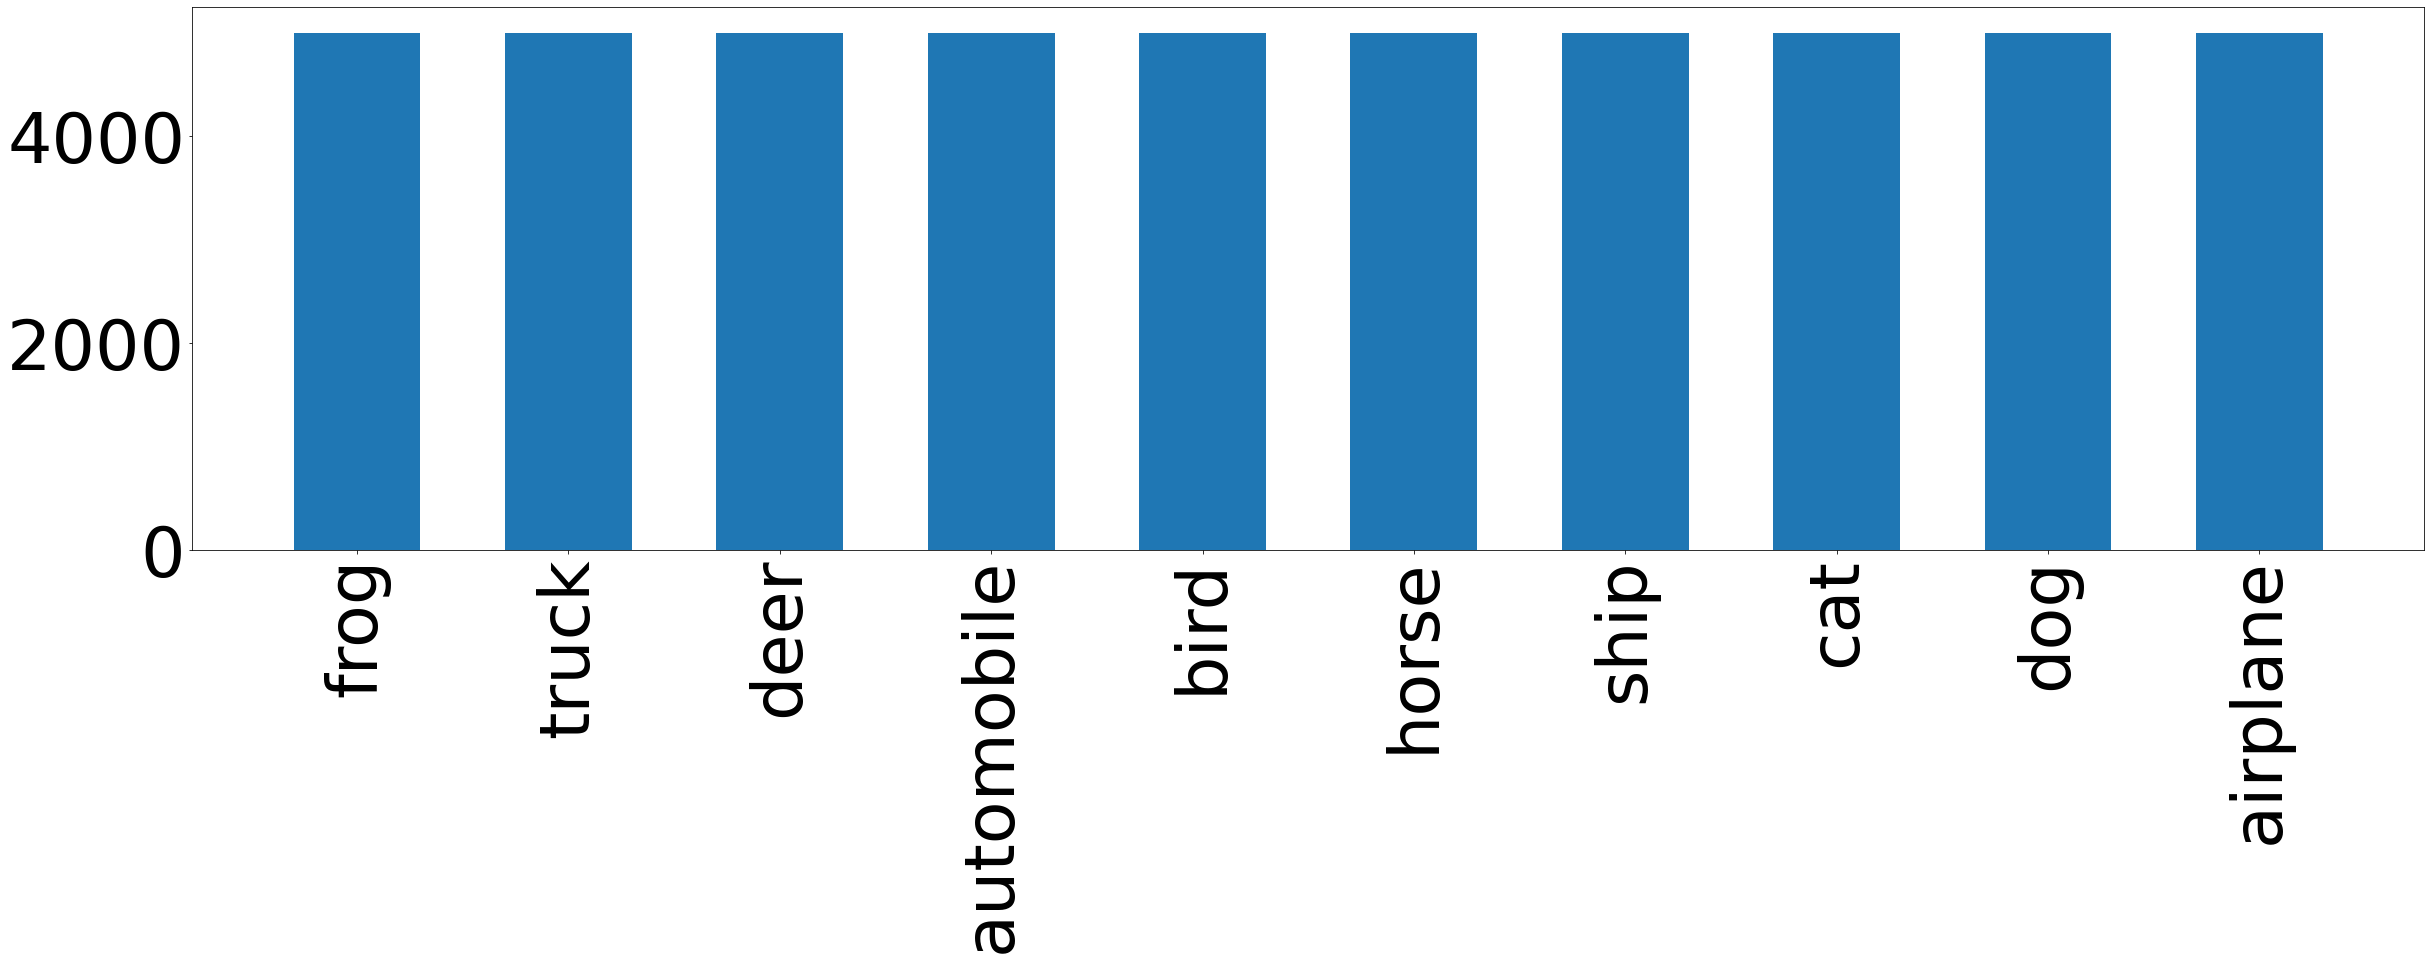

In [33]:
labels_map = {}
inv_labels_map = {}
count = 0
for label in traindf['label']:
  if(label in labels_map):
    continue
  labels_map[label] = count
  inv_labels_map[count] = label
  count = count + 1
# print("Label Map: ", labels_map)
# print("No. of Labels are: ", count)
# Let's check the distribution of the classes we have
labels_count = {}
for label in traindf['label']:
  if(label in labels_count):
    labels_count[label] = labels_count[label] + 1
  else:
    labels_count[label] = 0
# print(labels_count)
plt.figure(figsize=(40,10))
plt.bar(list(labels_count.keys()), list(labels_count.values()),width=0.6)
plt.rcParams.update({'font.size': 50})
plt.xticks(rotation = 90)
plt.show()

In [11]:
traindf.head()

,id,label
0,1.png,frog
1,2.png,truck
2,3.png,truck
3,4.png,deer
4,5.png,automobile


In [12]:
datagen=ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.20)

In [13]:
train_generator=datagen.flow_from_dataframe(
dataframe=traindf,
directory="/content/train",
x_col="id",
y_col="label",
subset="training",
batch_size=50,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(64,64))

Found 40000 validated image filenames belonging to 10 classes.


In [14]:
valid_generator=datagen.flow_from_dataframe(
dataframe=traindf,
directory="/content/train",
x_col="id",
y_col="label",
subset="validation",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(64,64))

Found 10000 validated image filenames belonging to 10 classes.


In [15]:
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from keras.models import Sequential
from keras.applications.mobilenet import MobileNet

In [16]:
model = Sequential()

In [17]:
model.add(ResNet50(input_shape=(64,64,3),include_top=False,weights='imagenet',pooling='avg'))
for layers in model.layers:
    layers.trainable=False
model.add(Dense(10,activation='softmax'))

In [28]:
!unzip test_data.zip

Archive:  test_data.zip
warning [test_data.zip]:  1048576 extra bytes at beginning or within zipfile
  (attempting to process anyway)
file #1:  bad zipfile offset (local header sig):  1048576
  (attempting to re-compensate)
  inflating: Object_classification_test_data/1.jpg  
  inflating: Object_classification_test_data/10.jpg  
  inflating: Object_classification_test_data/100.jpg  
  inflating: Object_classification_test_data/1000.jpg  
  inflating: Object_classification_test_data/1001.jpg  
  inflating: Object_classification_test_data/1002.jpg  
  inflating: Object_classification_test_data/1003.jpg  
  inflating: Object_classification_test_data/1004.jpg  
  inflating: Object_classification_test_data/1005.jpg  
  inflating: Object_classification_test_data/1006.jpg  
  inflating: Object_classification_test_data/1007.jpg  
  inflating: Object_classification_test_data/1008.jpg  
  inflating: Object_classification_test_data/1009.jpg  
  inflating: Object_classification_test_data/101.jpg  

In [18]:
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [19]:
test_generator=test_datagen.flow_from_dataframe(
dataframe=testdf,
directory="/content/Object_classification_test_data",
x_col="index",
y_col=None,
batch_size=15,
seed=42,
shuffle=False,
class_mode=None,
validate_filenames=False,
target_size=(64,64))

Found 1365 non-validated image filenames.


In [20]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [21]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [22]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
history=model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)

Epoch 1/10
800/800 [==============================] - 822s 1s/step - loss: 1.1546 - accuracy: 0.6217 - val_loss: 2.4195 - val_accuracy: 0.5490
Epoch 2/10
800/800 [==============================] - 823s 1s/step - loss: 0.9084 - accuracy: 0.6986 - val_loss: 2.8567 - val_accuracy: 0.5417
Epoch 3/10
800/800 [==============================] - 813s 1s/step - loss: 0.8543 - accuracy: 0.7156 - val_loss: 3.0946 - val_accuracy: 0.5508
Epoch 4/10
800/800 [==============================] - 812s 1s/step - loss: 0.8321 - accuracy: 0.7230 - val_loss: 2.9347 - val_accuracy: 0.5694
Epoch 5/10
800/800 [==============================] - 810s 1s/step - loss: 0.8230 - accuracy: 0.7286 - val_loss: 1.4254 - val_accuracy: 0.5581
Epoch 6/10
800/800 [==============================] - 811s 1s/step - loss: 0.8113 - accuracy: 0.7297 - val_loss: 1.6727 - val_accuracy: 0.5757
Epoch 7/10
800/800 [==============================] - 812s 1s/step - loss: 0.8110 - accuracy: 0.7309 - val_loss: 3.6069 - val_accuracy: 0.5698

In [23]:
model.evaluate_generator(generator=valid_generator,
steps=STEP_SIZE_VALID)

[3.573580503463745, 0.5558894276618958]

In [24]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [26]:
pred=model.predict_generator(test_generator,steps=STEP_SIZE_TEST,verbose=1)


In [27]:
predicted_class_indices=np.argmax(pred,axis=1)

In [28]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]


In [ ]:
filenames=test_generator.filenames# storing the prediction in csv file
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results1.csv",index=False)